<a href="https://colab.research.google.com/github/rahul-727/NLP-Lab-work/blob/main/Rahul_544_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Write a program to get Antonyms from WordNet.

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
from nltk.corpus import wordnet as wn

def get_antonyms(word):
    antonyms = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                antonyms.update([antonym.name() for antonym in lemma.antonyms()])
    return list(antonyms)

words = ["good", "hot", "increase", "early", "fast"]

for word in words:
    antonyms = get_antonyms(word)
    print(f"Antonyms of '{word}':", antonyms)


Antonyms of 'good': ['evil', 'badness', 'bad', 'ill', 'evilness']
Antonyms of 'hot': ['cold']
Antonyms of 'increase': ['decrease', 'decrement']
Antonyms of 'early': ['middle', 'late']
Antonyms of 'fast': ['slow']


# 2. Write a program for stemming non-English words.
Stemming is the process of reducing a word to its base or root form. The NLTK library offers stemming capabilities for English words, but for non-English words, you might need to use specific stemmers designed for those languages. One of the libraries that support multiple languages is SnowballStemmer, which is part of NLTK and can stem words in several languages including Spanish, French, German, and more.

In [4]:
from nltk.stem import SnowballStemmer

language = "spanish"
words = ["corriendo", "comer", "gatos", "bibliotecas", "universidades"]

stemmer = SnowballStemmer(language)

stemmed_words = [stemmer.stem(word) for word in words]

for original, stemmed in zip(words, stemmed_words):
    print(f"Original: {original}, Stemmed: {stemmed}")


Original: corriendo, Stemmed: corr
Original: comer, Stemmed: com
Original: gatos, Stemmed: gat
Original: bibliotecas, Stemmed: bibliotec
Original: universidades, Stemmed: univers


# 3. Write a program for lemmatizing words Using WordNet (Use all type of stemmers for the comparison).

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item, identified by the word's lemma, or dictionary form. Unlike stemming, lemmatization depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.

In [5]:
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.corpus import wordnet
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language='english')

words = ["running", "easily", "greater", "driven", "programming"]

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

for word in words:
    pos_tag = nltk.pos_tag([word])[0][1]
    wordnet_pos = get_wordnet_pos(pos_tag) or wordnet.NOUN

    lemmatized = lemmatizer.lemmatize(word, pos=wordnet_pos)

    porter_stemmed = porter.stem(word)
    lancaster_stemmed = lancaster.stem(word)
    snowball_stemmed = snowball.stem(word)

    print(f"Original: {word}")
    print(f"Lemmatized: {lemmatized}")
    print(f"Porter Stemmed: {porter_stemmed}")
    print(f"Lancaster Stemmed: {lancaster_stemmed}")
    print(f"Snowball Stemmed: {snowball_stemmed}")
    print("------")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Original: running
Lemmatized: run
Porter Stemmed: run
Lancaster Stemmed: run
Snowball Stemmed: run
------
Original: easily
Lemmatized: easily
Porter Stemmed: easili
Lancaster Stemmed: easy
Snowball Stemmed: easili
------
Original: greater
Lemmatized: great
Porter Stemmed: greater
Lancaster Stemmed: gre
Snowball Stemmed: greater
------
Original: driven
Lemmatized: driven
Porter Stemmed: driven
Lancaster Stemmed: driv
Snowball Stemmed: driven
------
Original: programming
Lemmatized: program
Porter Stemmed: program
Lancaster Stemmed: program
Snowball Stemmed: program
------


# 4. Write a program to differentiate stemming and lemmatizing words.

In [6]:
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

words = ["running", "flies", "mice", "easily", "worst"]

def get_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

for word in words:
    nltk_pos = nltk.pos_tag([word])[0][1]
    wordnet_pos = get_wordnet_pos(nltk_pos) or wordnet.NOUN

    lemmatized = lemmatizer.lemmatize(word, pos=wordnet_pos)

    stemmed = porter.stem(word)

    print(f"Original: {word}")
    print(f"Stemmed: {stemmed}")
    print(f"Lemmatized: {lemmatized}\n")

Original: running
Stemmed: run
Lemmatized: run

Original: flies
Stemmed: fli
Lemmatized: fly

Original: mice
Stemmed: mice
Lemmatized: mouse

Original: easily
Stemmed: easili
Lemmatized: easily

Original: worst
Stemmed: worst
Lemmatized: bad



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 5. Write a program for PoS Tagging and also execute any of the tool that given in class.

In [7]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

Tagged Tokens:
[('I', 'PRP'), ('enjoy', 'VBP'), ('exploring', 'VBG'), ('new', 'JJ'), ('technologies', 'NNS'), ('and', 'CC'), ('applying', 'VBG'), ('them', 'PRP'), ('to', 'TO'), ('solve', 'VB'), ('real-world', 'JJ'), ('problems', 'NNS'), ('.', '.'), ('Lately', 'RB'), (',', ','), ('I', 'PRP'), ('have', 'VBP'), ('been', 'VBN'), ('learning', 'VBG'), ('more', 'RBR'), ('about', 'IN'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('and', 'CC'), ('its', 'PRP$'), ('applications', 'NNS'), ('.', '.'), ('This', 'DT'), ('has', 'VBZ'), ('led', 'VBN'), ('me', 'PRP'), ('to', 'TO'), ('experiment', 'VB'), ('with', 'IN'), ('various', 'JJ'), ('NLP', 'NNP'), ('tools', 'NNS'), ('and', 'CC'), ('libraries', 'NNS'), ('.', '.')]


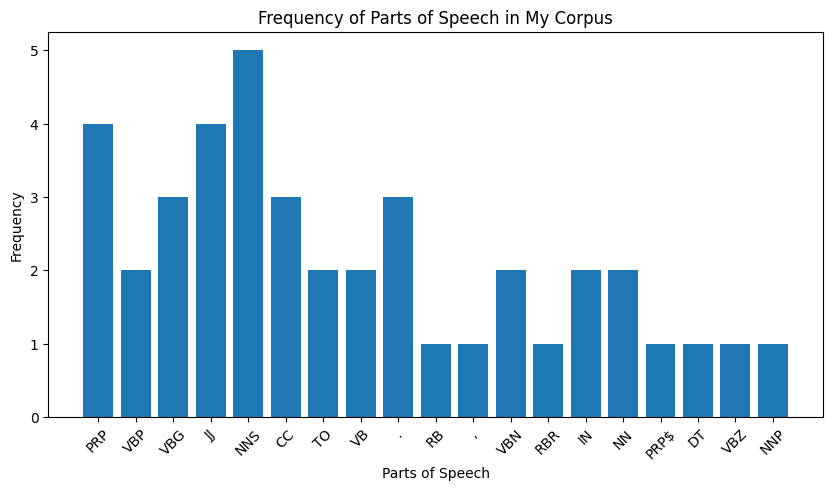

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

my_corpus = """
I enjoy exploring new technologies and applying them to solve real-world problems.
Lately, I have been learning more about natural language processing and its applications.
This has led me to experiment with various NLP tools and libraries.
"""

tokens = nltk.word_tokenize(my_corpus)

tagged_tokens = nltk.pos_tag(tokens)

tag_freq = Counter(tag for (word, tag) in tagged_tokens)

print("Tagged Tokens:")
print(tagged_tokens)

plt.figure(figsize=(10, 5))
plt.bar(tag_freq.keys(), tag_freq.values())
plt.xlabel('Parts of Speech')
plt.ylabel('Frequency')
plt.title('Frequency of Parts of Speech in My Corpus')
plt.xticks(rotation=45)
plt.show()


# 6. Write a program to identify the Named Entity Recognition and also execute any of the tool that given in class.
Named Entity Recognition (NER) is a process in Natural Language Processing (NLP) that identifies named entities in text, such as the names of people, places, organizations, dates, etc. For this example, I'll show you how to perform NER using the nltk library, which is a popular choice for introductory NLP tasks, and then how to visualize the entities using the simple visualization capabilities of matplotlib.

In [9]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

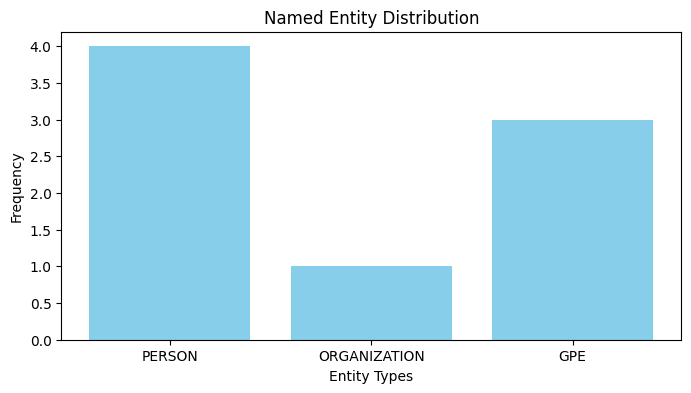

In [10]:
import nltk
from collections import defaultdict
import matplotlib.pyplot as plt

def plot_entity_distribution(entities):
    entity_types = defaultdict(int)

    for entity in entities:
        if isinstance(entity, nltk.Tree):
            entity_type = entity.label()
            entity_types[entity_type] += 1

    plt.figure(figsize=(8, 4))
    plt.bar(entity_types.keys(), entity_types.values(), color='skyblue')
    plt.xlabel('Entity Types')
    plt.ylabel('Frequency')
    plt.title('Named Entity Distribution')
    plt.show()

text = """
Apple Inc. is an American multinational technology company headquartered in Cupertino, California.
It was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in April 1976.
It is considered one of the Big Tech technology companies.
"""

tokens = nltk.word_tokenize(text)
tagged = nltk.pos_tag(tokens)

entities = nltk.ne_chunk(tagged)

plot_entity_distribution(entities)


# 7. Implement the Dependency Parsing and Constituency Parsing using the tool.


Dependency Parsing

In [11]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

sentence = "Autonomous cars shift insurance liability toward manufacturers."
doc = nlp(sentence)

displacy.serve(doc, style="dep")


/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Constituency Parsing 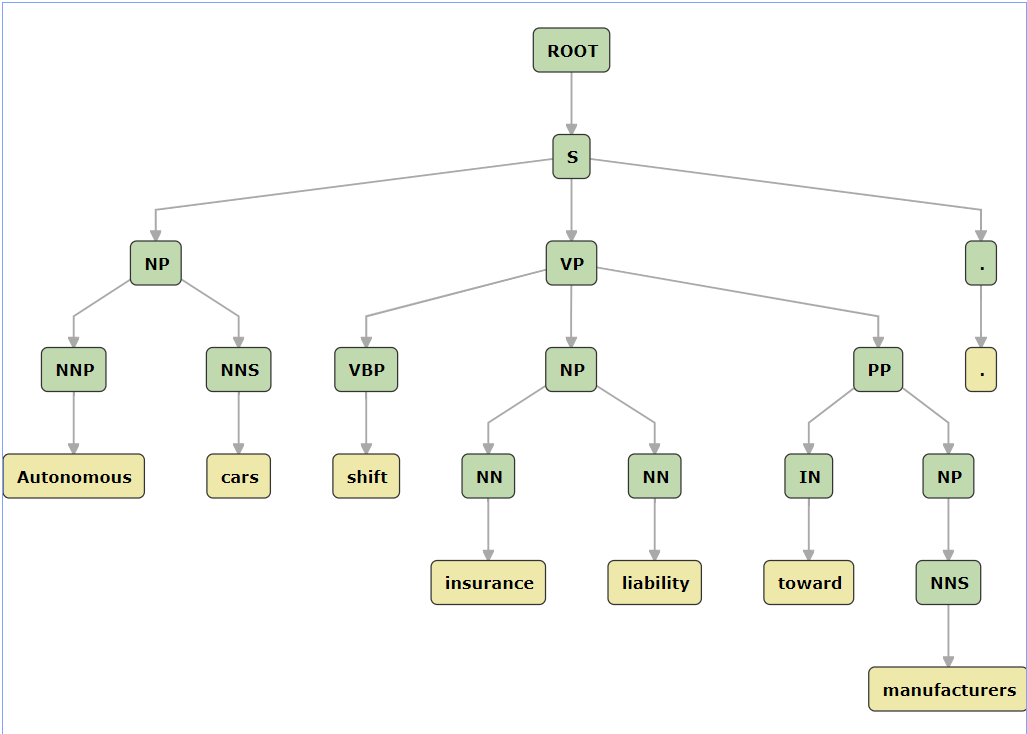